
<img src="Images/NumPy_logo.png" width="400">

# Programming for Data Analysis Assignment

## numpy.random package
***

**Assignment objectives:**

1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions. 
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

## 1. NumPy and random number generators
***

NumPy, stands for Numerical Python "is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more." [numpy.org](https://numpy.org/devdocs/user/whatisnumpy.html)

NumPy was created in 2005 by Travis Oliphant who incorporating features of the Numarray into Numeric, with extensive modifications. NumPy is open-source software and has many contributors. [Wikipedia](https://en.wikipedia.org/wiki/NumPy)

**`numpy.random`** is a module within the NumPy package which is used to generate pseudo-random values and provides a range of tools to  manipulate them. This module is similar to the Python standard library random but it works with numpy arrays.  It allows to create arrays of random numbers from various probability distributions and also randomly sample from arrays or lists. This module is frequently used to fake or simulate data which is an important tool in data analysis, scientific research, machine learning and multiple other areas. The simulated data becomes very handy as it can be used to test methods before applying them to the real data.

Python's standard library random  only samples one value at a time while numpy.random can efficiently generate arrays of sample values from various probability distributions and provides additional probability distributions to use. Numpy's random module is much faster and more efficient than the standard Python’s random library particularly when working with lots of samples, however for other simpler purposes the random module can be sufficient and even more efficient.

As computers cannot generate truly random numbers - they need a set of instructions to produce an output, that means they are predictable and reproducible which is beneficial when creating and testing code. Therefore both of the random modules can only produce what is called  pseudorandom numbers that may appear random but they are not truly so.

“Random number generators have applications in gambling, statistical sampling, computer simulation, cryptography, completely randomized design, and other areas where producing an unpredictable result is desirable.” Monte Carlo simulation uses random numbers to simulate real world problems. They are often used to assess the risk of a given trading strategy for options or stocks. A Monte Carlo simulator allow to visualize most of the potential outcomes which gives a much better idea regarding the risk of a decision. They are also used in cryptography – so long as the seed is secret. Sender and receiver can generate the same set of numbers automatically to use as keys.

In Machine learning random sampling  is often used an actual datasets for testing and evaluation analytical methods and algorithms. “Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.”  The machine learning algorithms in the scikit-learn package use numpy.random in the background. 
[scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

“Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions” [Random sampling]( https://numpy.org/doc/stable/reference/random/index.html)

Let's create an instance of a generator using `numpy.random` package. But before we proceed, we need to do all the necessary imports first:


In [1]:
# importing NumPy module
import numpy as np

# for data analysis
import pandas as pd

# importing matplotlib and seaborn for plotting and visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# We can create a new constructor using the default_rng method to get a new instance of a random number generator.
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7FD4C38007C0

"PCG is a family of simple fast space-efficient statistically good algorithms for random number generation. Unlike many general-purpose RNGs, they are also hard to predict." [pcg-random.org](https://www.pcg-random.org/index.html)

## 2.1 Simple random data
***

There are four methods in Simple random data which we going to explore below: **random, integers, choice** and **bytes.**

It is very easy to create a random number(s) using `numpy.random`. As a first example, let's create 5 random float numbers between 0 and 1 by using the instance of a random number generator which we have created above.

<span style="color:Blue; font-weight:bold;">random</span>([size, dtype, out]) returns random floats in the half-open interval [0.0, 1.0).

In [2]:
# returns an array of 5 floats (if no parameters are specified, returns just one number).
rng.random(5)

array([0.38449983, 0.93155805, 0.10447215, 0.2860657 , 0.74797644])

In [3]:
# returns an array of 2x3 floats
rng.random((2,3))

array([[0.15242127, 0.23167418, 0.1342114 ],
       [0.6534395 , 0.91584136, 0.09126765]])

In [4]:
# Three-by-two array of random numbers from [-3, 0):
3 * rng.random((3, 2)) - 3

array([[-1.58490278, -1.83740806],
       [-1.6193625 , -2.56129513],
       [-2.35601951, -2.63312072]])

<span style="color:Blue; font-weight:bold;">integers</span>(low[, high, size, dtype, endpoint])) returns random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive).

In [5]:
# returns an integer between 0-9
rng.integers(10)

9

In [6]:
# returns an array of 10 numbers between 5-8
rng.integers(5, 8, 10)

array([5, 7, 6, 5, 6, 5, 7, 5, 5, 7])

<span style="color:Blue; font-weight:bold;">bytes</span>(length) returns random bytes. The length of the string to be returned must be provided to the numpy.random.bytes function.

In [7]:
# returns 10 random bytes
rng.bytes(10)

b'A\xe1\x08\xf9\xd2[\x1b\xc8\xb3\x02'

<span style="color:Blue; font-weight:bold;">choice</span>(a[, size, replace, p, axis, shuffle]) gmenerates a random sample from a given array. 

In [8]:
# choose 5 numbers at random from the range 0-19
rng.choice(20, 5)

array([ 2, 18,  0,  2,  7])

We can use **choice()** methods with other data types, for example strings

In [9]:
# create a list of strings
colors = ["green", "red", "blue", "orange", "white"]

# choose 2 items from the list
rng.choice(colors, size=2)

array(['blue', 'white'], dtype='<U6')

We can 'weight' the probability for each item in the list. In the example below the 5th and and the 3d items in the list are respectivle 5 times and 2 times more likely to be returned than the others.

In [10]:
rng.choice(colors, p=[0.1, 0.2, 0.1, 0.1, 0.5], size=6)

array(['orange', 'white', 'orange', 'red', 'white', 'orange'], dtype='<U6')

## 2.2 Permutations
***

There are three permutations methods in the numpy.random package.

- <span style="color:Blue; font-weight:bold;">shuffle</span>(x[, axis]) is used to modify an array or sequence in-place by shuffling its contents.
- <span style="color:Blue; font-weight:bold;">permutation</span>(x[, axis]) is used to randomly permute a sequence, or return a permuted range.
- <span style="color:Blue; font-weight:bold;">permuted</span>(x[, axis, out]) is used to randomly permute x along axis *axis*.

These methods can be used to (re)arrange series of numbers or to change the order of samples in a sequence. In machine learning these functions are often used to separate a dataset into training and test sets. Permutation method can be used to shuffled multi-dimensional arrays. When shuffling rows of data it is usually important to keep the contents of the row together while the order of the rows will be moved about.
The main difference between "permutation" and  "shuffle" is that first one creates a new array while the other one alters the original array.

To get a better understanding of how it works, let's look at some examples below:

In [11]:
# creating an array of numbers 0 to 10
arr1 = np.arange(10)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# 'shuffles' the array, the original array is now altered
rng.shuffle(arr1)
arr1

array([6, 3, 8, 0, 9, 4, 7, 1, 5, 2])

In [13]:
arr2 = np.arange(2,41,2).reshape(4,5)   ## create a 4 by 5 two-dimensional array
arr2

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30],
       [32, 34, 36, 38, 40]])

In [14]:
# shuffles the 2D array within rows only
rng.shuffle(arr2, axis=1)
arr2

array([[ 8, 10,  2,  4,  6],
       [18, 20, 12, 14, 16],
       [28, 30, 22, 24, 26],
       [38, 40, 32, 34, 36]])

Now let's look at permutation method when used on the same arrays

In [15]:
# creating an array of numbers 0 to 10
arr3 = np.arange(10)
arr3

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
# random permutation
rng.permutation(arr3)

array([7, 4, 0, 3, 2, 8, 1, 5, 9, 6])

In [17]:
# the original array is intact
arr3

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
arr4 = np.arange(2,41,2).reshape(4,5)   ## create a 4 by 5 two-dimensional array
arr4

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30],
       [32, 34, 36, 38, 40]])

In [19]:
# permutates the 2D array - rows only
rng.permutation(arr4)

array([[32, 34, 36, 38, 40],
       [22, 24, 26, 28, 30],
       [12, 14, 16, 18, 20],
       [ 2,  4,  6,  8, 10]])

In [20]:
# permutates 'colums' in the 2D array
rng.permutation(arr4, axis=1)

array([[ 6,  4,  2, 10,  8],
       [16, 14, 12, 20, 18],
       [26, 24, 22, 30, 28],
       [36, 34, 32, 40, 38]])

In [21]:
# just to confirm, the original array is intact
arr4

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30],
       [32, 34, 36, 38, 40]])

If we use **permuted** method on the same array, we can notice that each slice along the given axis is shuffled independently of the others.

In [22]:
#rng.permuted(arr4, axis=1)

We can also use permutation to create a random array from a range

In [23]:
# creates a permutation of the numbers 0-49
print(rng.permutation(50))

[ 2 33 28  0 27 37 42 34 35 23 46 20 14 25 12 44 48 22 24  1 39 26 21  5
 13 36  3 11 47 32 15 41 38  9  4 10 49 17 30 43 45 16 29  7 40  6 31 18
 19  8]


## 3. Probability Distribution
***

A probability distribution is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range. There are many different patterns of probability and random numbers can be drawn from various probability distributions.

Probability distributions are of two types:
1. Discrete Probability Distribution
2. Continuous Probability Distribution or Probability Density Function

A discrete random variable is one where its set of possible values is a collection of isolated points on the number line - it has a finite set of specific outcomes, while a continuous random variable is one where its set of possible values is an entire interval on the number line. Discrete random variables almost always come from counting while continuous random variables mostly come from measurement.

Probability distributions are used widely in data analytics, statistical analysis and machine learning. They can be simulated based on their mathematical properties. Probability distributions are derived from variance or uncertainty and show which outcomes are more likely and which are less likely.

There is a very long list of various probability distribution which can be found on [Wikipedia](https://en.wikipedia.org/wiki/List_of_probability_distributions). In this project we going to have a look at a five of most commonly used ones as example. 

## 3.1 Normal (Gaussian) Distribution
***

[Normal distribution](https://www.britannica.com/topic/normal-distribution), also known as Gaussian Distribution represents the behavior of most situations in the universe. It is the most important probability distribution in statistics for independent, random variables.  It has a symmetric, bell shaped density curve which is described by its mean 𝝁 and standard deviation 𝝈. It represents things like IQ Scores, heartbeats, people's heights and weights, among others.

The [`numpy.random.normal(loc=0.0, scale=1.0, size=None)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) function generates random number in a bell shaped curve centred around zero but spread out according to the scale parameter.

The following parameters are used in the function:
- <span style="color:Blue; font-weight:bold;">loc</span> argument is used to specify the mean or the centre of the distribution (peak of the bell curve)
- <span style="color:Blue; font-weight:bold;">scale</span> is used to specify the standard deviation of the distribution (distance from the mean)
- <span style="color:Blue; font-weight:bold;">size</span> is the number of random variables to sample (shape of the array)

If no paremters are passed, a single value will be returned using a mean of 0 and standard deviation of 1. This is  known as standard normal distribution and numpy.random has a separate standard_normal() function which only takes a size as a parameter and leaves the mean and standard deviation at 0 and 1 respectively. Let's have a look at both of the examples below:

In [24]:
# Example of the normal() function without any parameters passed
rng.normal()

-0.5889220313716083

In [25]:
# Example of the standard_normal() function without any parameters passed
rng.standard_normal()

-0.13250740466832292

Now, let's create an array of 100 values using standard_normal() function with 𝝁 = 5.

In [26]:
# specifying the mean as 4.0
norm = rng.normal(loc=5, size=100)
norm

array([5.4681022 , 5.32441593, 4.52242655, 4.41642664, 4.62684536,
       4.97326079, 4.6687071 , 4.32455542, 4.00768006, 5.50368399,
       4.8892849 , 5.1690706 , 5.6598506 , 4.85953472, 4.65879157,
       4.8047874 , 4.41956983, 3.04164925, 4.55601565, 3.66318347,
       5.72512898, 4.81619021, 2.93054851, 6.73739981, 5.02126048,
       4.22060841, 6.42426986, 7.68469631, 5.28038633, 5.74479567,
       5.42505804, 5.74970926, 5.3052267 , 5.33231271, 4.16029088,
       3.67732002, 5.42419606, 6.55970513, 5.10271505, 6.2992012 ,
       5.14135591, 4.55349622, 5.56401456, 4.58745447, 5.09228535,
       4.64225081, 3.78028173, 4.12135956, 5.75823724, 4.28466086,
       3.90488063, 6.34190783, 4.76723186, 5.85269825, 4.98418636,
       4.73299818, 4.8498134 , 5.73789204, 3.67153398, 5.8090898 ,
       5.83571632, 6.40884618, 5.64878697, 5.90393359, 4.82719307,
       5.0364473 , 6.41714344, 6.62777567, 5.400108  , 3.97394773,
       4.86691316, 4.20366138, 5.69091678, 4.37221655, 4.49018

As it is always better to visualise the data instead of just looking at numbers, we going to create a few simple plots using numpy and seaborn functionality below:

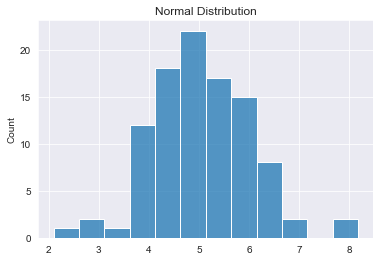

In [27]:
# First, let's create a histogram using the array norm which we had created above
sns.set_style("darkgrid")
sns.histplot(norm).set_title("Normal Distribution");

Now, let's plot the same data but using the KDE - kernal density estimation which is a useful tool in visualing normal distributions. It smooths out the curves by estimating all of the values in between.

Information on how to creat KDE plot with seaborn can be found https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Text(0.5, 1.0, 'Normal Distribution with KDE')

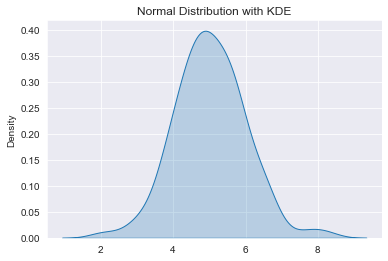

In [28]:
sns.kdeplot(data=norm, fill=True).set_title('Normal Distribution with KDE')

From the example above we can see that the bell shape curve of our plot isn't perfect, we can improve that by choosing the higher size of the data sample. To see the diffrence that **size** parameter makes we going to look at the data sample between 10 and 1,000,000. We can use the default paramters of mean = 0 and standart deviation = 1.

In [29]:
a = rng.standard_normal(10)
b = rng.standard_normal(100)
c = rng.standard_normal(1000)
d = rng.standard_normal(10000)
e = rng.standard_normal(100000)
f = rng.standard_normal(1000000)

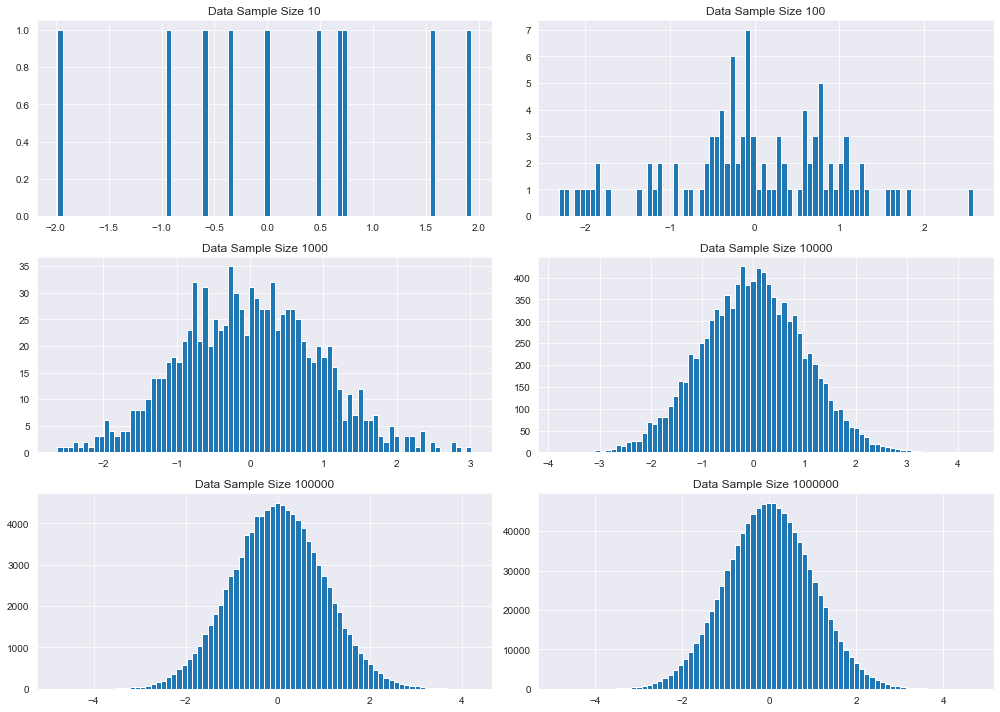

In [30]:
# creating 3 rows and 2 columns of plots
fig, axs = plt.subplots(3,2,figsize=(14,10))
# axs[0,0] etc. specifies location of the plot on the grid, 
# we can select the number of bins to see more detailed distribution
axs[0,0].hist(a, bins=80)
axs[0,0].set_title('Data Sample Size 10')
axs[0,1].hist(b, bins=80)
axs[0,1].set_title('Data Sample Size 100')
axs[1,0].hist(c, bins=80)
axs[1,0].set_title('Data Sample Size 1000')
axs[1,1].hist(d, bins=80)
axs[1,1].set_title('Data Sample Size 10000')
axs[2,0].hist(e, bins=80)
axs[2,0].set_title('Data Sample Size 100000')
axs[2,1].hist(f, bins=80)
axs[2,1].set_title('Data Sample Size 1000000')
# creates space between each of the subplots
fig.tight_layout()


We can see that the last plot which has size = 1,000,000 has a perfect bell shape curve.

Now we can compare the plots with different means and standard deviations.

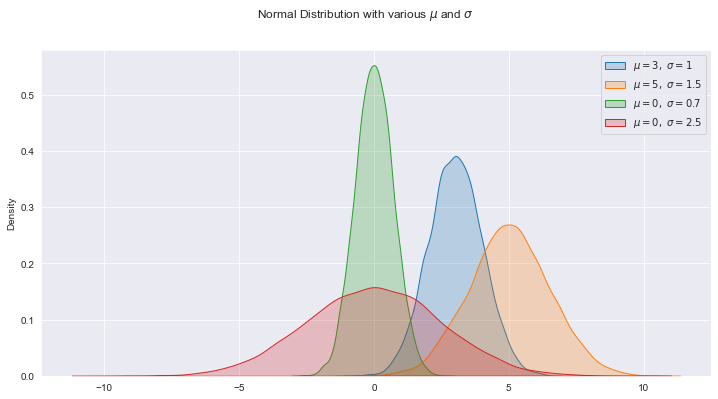

In [31]:
# Specifiyng loc, scale and size attributes
loc,scale,size = 3,1,10000
# Generating four random datasets specifying loc(mean) and scale(standard deviation)
ds1 = np.random.normal(loc,scale,size)
ds2 = np.random.normal(loc+2, scale+0.5,size)
ds3 = np.random.normal(loc-3,scale-0.3,size)
ds4 = np.random.normal(loc-3,scale+1.5,size)

# setting size of the figure
plt.figure(figsize=(12,6))  
# using seaborn kdeplot function to plot 
sns.kdeplot(ds1,fill=True,label="$\mu=3,\ \sigma=1$")
sns.kdeplot(ds2,fill=True, label ="$\mu=5,\ \sigma=1.5$")
sns.kdeplot(ds3,fill=True, label="$\mu=0,\ \sigma=0.7$")
sns.kdeplot(ds4,fill=True, label ="$\mu=0,\ \sigma=2.5$")
plt.legend()
plt.suptitle('Normal Distribution with various $\mu$ and $\sigma$')
plt.show()

The plot above demonstrate the bell-shaped nature of the normal distributions. When we changing the loc parameter it moves the curve along the X-axis while if we changing the scale parameter it either tightens or spreads out the width of the distribution along the X-axis.The curves never cross the x-axis, they continue to infinity in both directions of the mean. However the chances of observing values more than 3 standard deviations from the centre or mean of the curve is very small.

There is an [Empirical rule](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/empirical-rule-2/) for the Normal Distribution according to which 68% of the values under the curve fall between -1 and +1 standard deviations from the mean, 95% of the values fall within two standard deviations from the mean and 99.7% within 3 standard deviations. This rule applies no matter what the mean and standard deviations are. 

## 3.2 Uniform Distribution
***

The uniform distribution is a symmetric probability distribution where all outcomes have an equal likelihood of occurring. All values in the distribution have a constant probability, making them uniformly distributed. This distribution is also known as the rectangular distribution because of its shape in probability distribution plots.

Examples of the uniform distribution can be: rolling dice and coin tosses; the probability of drawing any card from a deck of cards. Random number generators use the uniform distribution because no number should be more common than other numbers, there is no skew in a uniform distribution like there is in other distributions.

Numpy has [`numpy.random.uniform(low=0.0, high=1.0, size=None)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function produces value within the given interval which is equally likely to be drawn by uniform.

Let's have a look at a few examples:

In [32]:
# if no parameters specified returns a floating point number in the interval [0,1)
rng.uniform()

0.8184180726946927

If only one value is provided, it will be considered as the upper limit (non-inclusive)

In [33]:
# returns a floating point number between 0.0 and 7.0
rng.uniform(7)

4.6626792450357115

In [34]:
# returns a floating point number in the interval [5,10)
rng.uniform(5,10)

7.775470098075392

We can also create multiple values if we use size paraeter or create a 2D array.

In [35]:
rng.uniform(5, 15, size=(4, 3))

array([[ 9.13599669,  8.21386457, 14.6883053 ],
       [12.88135152, 14.67719994,  6.07613508],
       [ 8.131886  , 14.03841982,  9.28857769],
       [12.87251167, 12.02646242, 13.95902156]])

To visualize this, we can display results on the grid plot, lets use 1000 values between 5 and 15

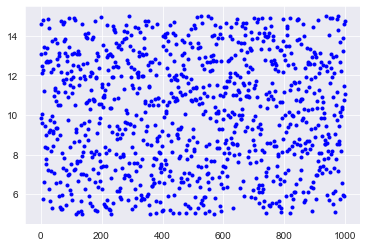

In [36]:
s = rng.uniform(5, 15, size=1000)
plt.plot(s, 'b.')


Below, we can use the example from official [numpy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to display the histogram of the samples, along with the probability density function

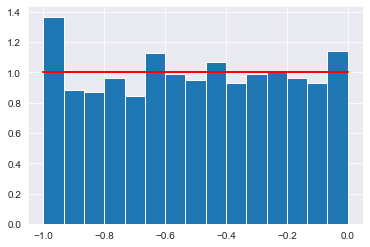

In [37]:
s = np.random.uniform(-1,0,1000)
# use np.ones_like function to return an array of ones with the same shape and type as s.
import matplotlib.pyplot as plt
# specifying amont of bins - 15 
count, bins, ignored = plt.hist(s, 15, density=True) 
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r') # add a horizontal line at 1.0 using the np.ones like
plt.show()


The bigger the size of the array the easier it is to recognise uniform distribution. Below, we going to create  various sizes of arrays of values between 0 and 50. Theoretically there's an equal chance for each value to occur but this only becomes obvious when we increase the sample size, which is clearly confirmed by the plots below. The last plot which has a sample of 10 million values is almost a straight line.

In [38]:
# looking at the difference the sample size makes
a = rng.integers(50, size = 100)
b = rng.integers(50, size = 1000)
c = rng.integers(50, size = 10000)
d = rng.integers(50, size = 100000)
e = rng.integers(50, size = 100000)
f = rng.integers(50, size = 10000000)

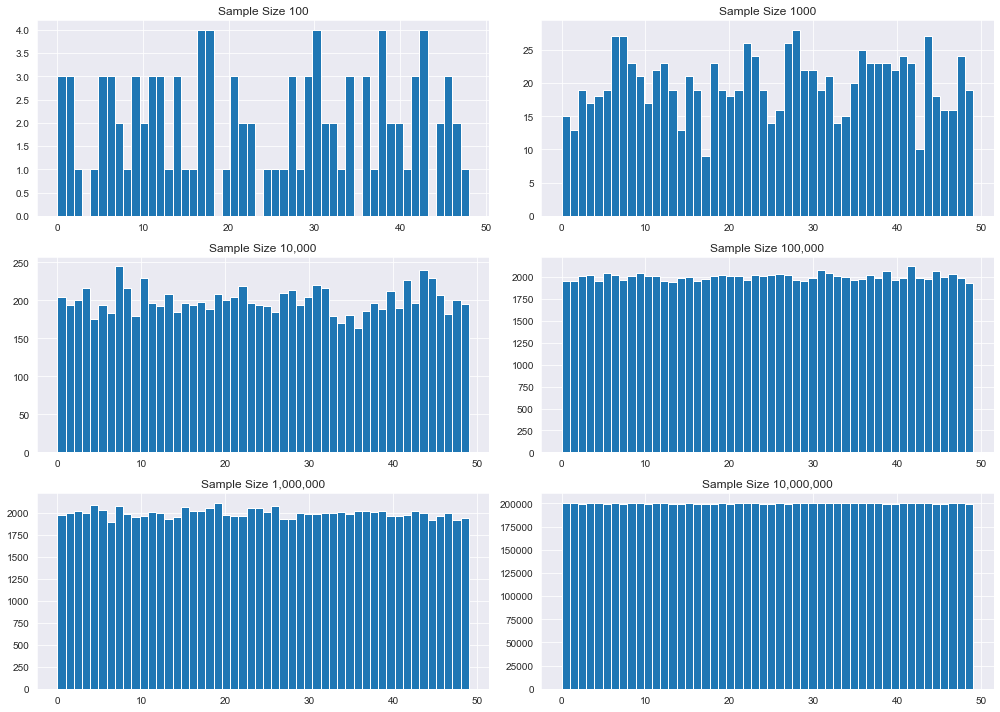

In [39]:
# creating 3 rows and 2 columns of plots
# axs[0,0] etc. specifies location of the plot on the grid
fig, axs = plt.subplots(3,2, figsize=(14,10))
axs[0,0].hist(a, bins=50)
axs[0,0].set_title('Sample Size 100')
axs[0,1].hist(b, bins=50)
axs[0,1].set_title('Sample Size 1000')
axs[1,0].hist(c, bins=50)
axs[1,0].set_title('Sample Size 10,000')
axs[1,1].hist(d, bins=50)
axs[1,1].set_title('Sample Size 100,000')
axs[2,0].hist(e, bins=50)
axs[2,0].set_title('Sample Size 1,000,000')
axs[2,1].hist(f, bins=50)
axs[2,1].set_title('Sample Size 10,000,000')
# creates space between each of the subplots
fig.tight_layout()

## 3.3 Binomial Distribution
***

[Binomial distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial) is when we're dealing with only two possible outcomes (success or a failure) in an experiment that is repeated many times. Example of the outcomes of binomial experiment can be heads or tails of a coin, true or false,  pass or fail. One of these outcomes can be called a success and the other a failure. The probability of success is the same on every trial. 

The `numpy.random.binomial(n, p, size=None)` function is used to sample from a binomial distribution given the number of trials **n** and the probability **p** of success on each trail. The number of samples **size** represents the number of times to repeat the n trials.

Number of trials **n** should be an integer greater than or equal to zero. The probability **p** must be in the interval [0,1] as total probability always sums to one. It returns an array of samples drawn from the binomial distribution based on the n and p and size parameters given to the function. Each sample returned is equal to the number of successes over n trials.

The following parameters are used in the function:
-	<span style="color:Blue; font-weight:bold;">n</span> the number of trials,
-	<span style="color:Blue; font-weight:bold;">p</span> the probability of success in each trial
-	<span style="color:Blue; font-weight:bold;">size</span> is the number of samples drawn (the number of times the experiment is run)


In [40]:
# simple example which returns either 0 or 1 ten times
rng.binomial(n=1, p=0.5, size=10)

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

<img src="https://www.sitesbay.com/aptitude/images/toss-coin-probability.jpg" width="400">

Now, lets imagine we've tossed a coin 100 times and have a look at the results on a bar chart. In theory both reults should be equal. 

In [41]:
coin = rng.binomial(n=1, p=0.5, size=100)

<BarContainer object of 2 artists>

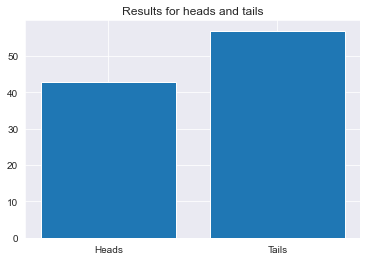

In [42]:
# we can easily create a plot using matplotlib
plt.title("Results for heads and tails") 
plt.bar(['Heads', 'Tails'], [coin.size - coin.sum(), coin.sum()])

Text(0.5, 1.0, 'Results for heads and tails')

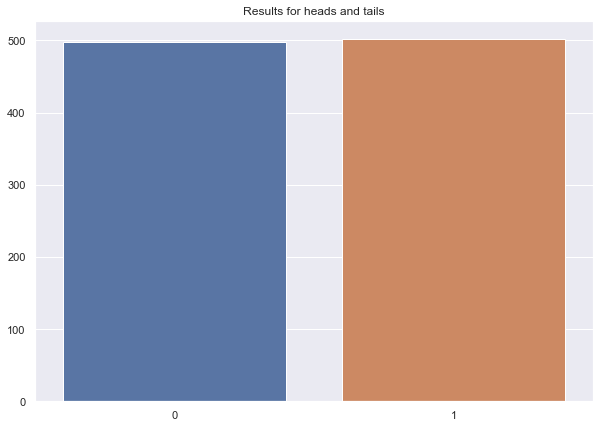

In [43]:
sns.set(rc={'figure.figsize':(10,7)})
coin2 = rng.binomial(n=1, p=0.5, size=1000)
# now let's try the same with seaborn, using inique function. We will "toss the coint" 1000 times now
unique, counts = np.unique(coin2, return_counts=True)
sns.barplot(x=unique, y=counts).set_title("Results for heads and tails")

In [44]:
u = rng.binomial(n=10, p=0.5, size=10000)

We can again use a bar chart to plot this, but first we have to isolate the unique values using NumPy's unique function, and the counts for each.



In [45]:
unique, counts = np.unique(u, return_counts=True)
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Text(0.5, 1.0, 'Results for 10 coin tosses, 10000 times')

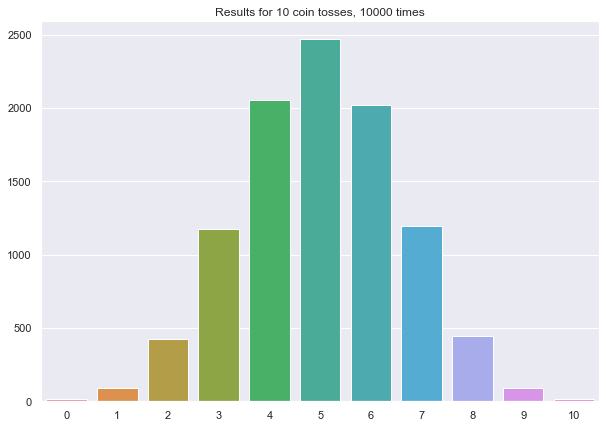

In [46]:
# creating a barplot
sns.barplot(x=unique,y=counts).set_title("Results for 10 coin tosses, 10000 times") 

This time the plot looks like a normal distribution.

<img style="float: left; padding-right:30px" src="https://www.frontlinegaming.org/wp-content/uploads/2017/12/Rolling-Dice.jpg" width="400">

Suppose we’re playing a game where we want to roll sixes on a die. If we want to know the probability of rolling  sixes in ten die rolls, we can easily demonstrate it using binomial distribution, it is beneficial because it can describe the probability of all possible numbers of successes out of the total number of trials (N). 

In the graph below, the distribution finds the probability of rolling exactly no sixes, 1 six, 2 sixes, 3 sixes, . . ., and up to 10 sixes in the ten die rolls. Using this approach, the distribution covers the complete range of possible successes up to the total number of trials. [statisticsbyjim](https://statisticsbyjim.com/probability/binomial-distribution/)

Text(0.5, 1.0, 'Rolling Sixes in 10 Die Rolls')

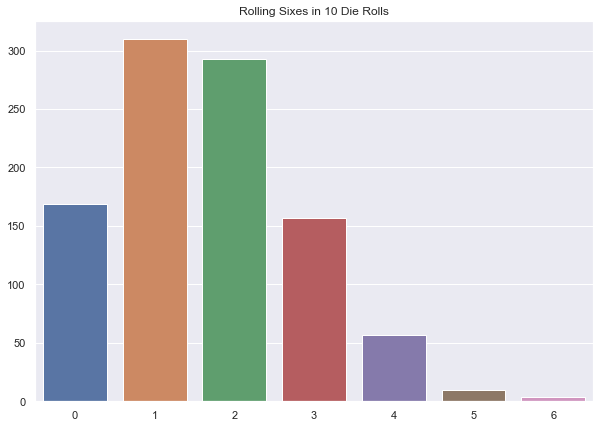

In [47]:
# the number of trials is 10 (n), and the probability (p) is 1/6 = 0.1667.
d = rng.binomial(n=10, p=0.1667, size=1000)
unique, counts = np.unique(d, return_counts=True)
sns.barplot(x=unique, y=counts).set_title("Rolling Sixes in 10 Die Rolls")

In the chart, each bar represents the probability of rolling a specific number of sixes out of ten die rolls. The graph does not show the chances for seven and higher because the likelihoods of that many sixes in just ten rolls are too low to display on the chart.

The graph indicates the probability of rolling no sixes is about 16%. The highest chance is rolling one six (32%). Although, rolling two sixes occurs almost as frequently. Probabilities drop off quickly starting with three sixes.

## 3.4 Poisson Distribution
***

[Poisson Distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson), named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume. [Wiki](https://en.wikipedia.org/wiki/Poisson_distribution#:~:text=In%20probability%20theory%20and%20statistics,time%20since%20the%20last%20event.) It is in fact a limiting case of the binomial distribution.
It can be used to simulate number of 'events' occuring in specific intervals when the average freqency rate is known and is not dependent on the previous occurances.

`numpy.random.poisson(lam=1.0, size=None)` function is used to draw samples from a Poisson distribution. It takes a  parameter as well as a size for the number of samples.

As a first example of Poisson distribution we going to use one from official numpy documentation.

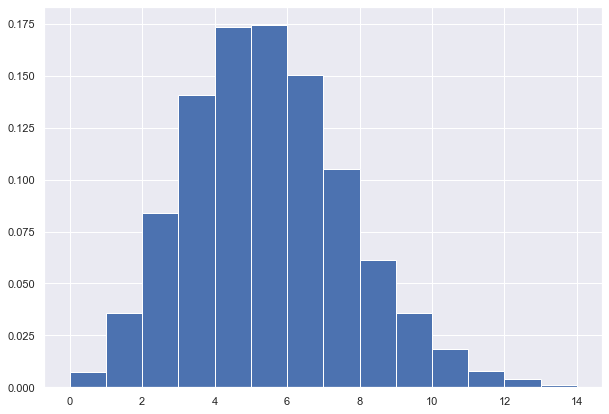

In [48]:
# lambda is set to 5, 1000 samples
s = rng.poisson(5, 10000)
# plotting histogram of values
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

Let's create a 1000x4 array with samples from poisson distributions with different 𝛌 parameters. Then we can create a DataFrame and then look at the summary statistics using `pandas.describe` function. From the results we can see that expected value, variance and lambda are all very close.

In [49]:
# Draw each 10 values for lambda 5,10,30 and 50
s = np.random.poisson(lam=(5,10,30,50), size=(1000, 4))
poissonDist= pd.DataFrame(s, columns=['lambda=5','lambda10','lambda=30','lambda=50'])
print(poissonDist.describe())

print("\nVariances")
print(poissonDist.var())

          lambda=5     lambda10    lambda=30    lambda=50
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      4.988000     9.966000    29.820000    50.149000
std       2.262515     3.102978     5.331231     7.121904
min       0.000000     1.000000    15.000000    32.000000
25%       3.750000     8.000000    26.000000    45.000000
50%       5.000000    10.000000    30.000000    50.000000
75%       6.000000    12.000000    33.000000    55.000000
max      14.000000    20.000000    50.000000    76.000000

Variances
lambda=5      5.118975
lambda10      9.628472
lambda=30    28.422022
lambda=50    50.721521
dtype: float64


Next we are going to compare poisson distribution with different 𝛌's on a plot.

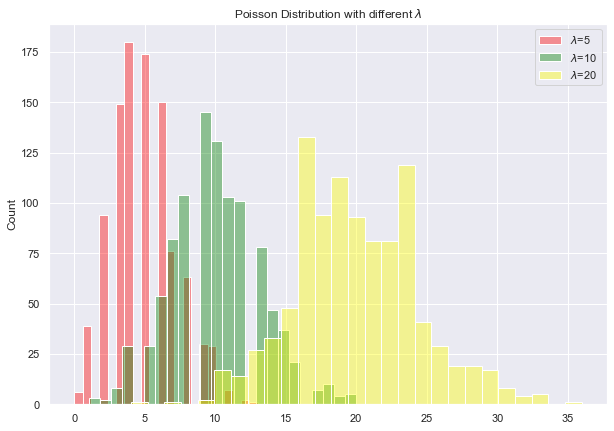

In [50]:
# specifying 𝛌 and size
lam,size = 5,1000
# Generate a random datasets using random.poisson
p1 = np.random.poisson(lam, size) 
p2 = np.random.poisson(lam+5, size) 
p3 = np.random.poisson(lam+15, size) 
# creating 3 histograms
sns.histplot(p1, label = "$\lambda$=5", color="red", alpha=0.4 ) 
sns.histplot(p2, label = "$\lambda$=10", color="green", alpha=0.4) 
sns.histplot(p3, label = "$\lambda$=20", color="yellow", alpha=0.4) 

plt.legend()
plt.title("Poisson Distribution with different $\lambda$")
plt.show()

britannica - https://www.britannica.com/topic/normal-distribution
Wiki - https://en.wikipedia.org/wiki/Normal_distribution
statisticsbyjim - https://statisticsbyjim.com/basics/normal-distribution/